#### **The Dataset used for this challenge is [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)**

##### Import Libraries

In [1]:
# Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../HeartDisease"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'heart.csv', 'heartdisease.ipynb']


#### Read the dataset and save to variable datafr

In [2]:
datafr = pd.read_csv("../HeartDisease/heart.csv", error_bad_lines=False)

#### Displaying the structure of dataset

In [3]:
display(datafr.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Identifying the shape of the dataset

In [4]:
# Dimension of the datatset
print("Dimension of the dataset is: ",datafr.shape)

Dimension of the dataset is:  (303, 14)


#### Description of each column
* age: age in years
* sex: female=0; male=1
* cp: chest pain type (4 levels)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results (3 levels)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy (3 levels)
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: (class variable) with 1 or 0

#### Categorical attributes are :-
"cp","fbs", "restecg", "ca", "thal"

#### Numeric attributes are :-
"age", "sex", "trestbps", "chol", "thalach", "exang", "oldpeak", "slope"

#### Visualizing the distribution of dataset based on attribute sex

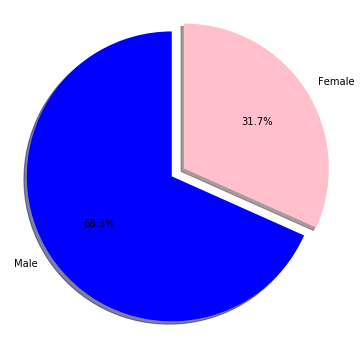

In [32]:
male =len(datafr[datafr['sex'] == 1])
female = len(datafr[datafr['sex']== 0])

plt.figure(figsize=(6,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]

# Plot
plt.pie(sizes, explode=(0, 0.1), labels=labels, colors=['blue','pink'],
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

#### Plot displaying male and female with potential heart disease based on age

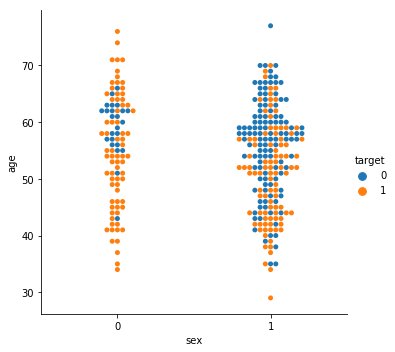

In [40]:
sns.catplot(x="sex", y="age", hue="target", kind="swarm", data=datafr)

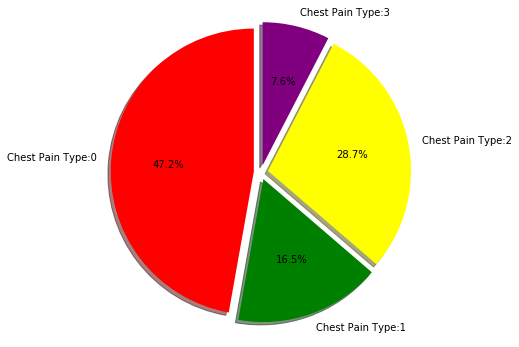

In [29]:
# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(datafr[datafr['cp'] == 0]),len(datafr[datafr['cp'] == 1]),
         len(datafr[datafr['cp'] == 2]),
         len(datafr[datafr['cp'] == 3])]

plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05), labels=labels, colors=['red','green', 'yellow', 'purple'],
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()